In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.
# Then, freeze the base model.

base_model.trainable = False
# Create a new model on top.

inputs = keras.Input(shape=(150, 150, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(10)(x)
model = keras.Model(inputs, outputs)
# Train the model on new data.


model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [3]:
from tensorflow import keras

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images,
                               test_labels) = keras.datasets.cifar10.load_data()

train_images = train_images[:1000]
train_labels = train_labels[:1000]

train_images = tf.image.resize(train_images, [150, 150])
test_images = tf.image.resize(test_images, [150, 150])

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert the labels to binary format (0 or 1)
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)


In [4]:
history1 = model.fit(train_images, train_labels, epochs=4,
                     validation_data=(test_images, test_labels))


Epoch 1/4
32/32 [==============================] - ETA: 0s - loss: 0.3653 - binary_accuracy: 0.8894

KeyboardInterrupt: 

## basecase

In [ ]:
# Define a new model from scratch
model_scratch = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10)
])

# Compile the model
model_scratch.compile(optimizer=keras.optimizers.Adam(),
                        loss=keras.losses.BinaryCrossentropy(from_logits=True),
                        metrics=[keras.metrics.BinaryAccuracy()])


In [ ]:
# Train the model
history_scratch = model_scratch.fit(train_images, train_labels, epochs=4,
                                    validation_data=(test_images, test_labels))


Epoch 1/4
32/32 [==============================] - 46s 1s/step - loss: 0.3636 - binary_accuracy: 0.9000 - val_loss: 0.3301 - val_binary_accuracy: 0.9000
Epoch 2/4
32/32 [==============================] - 44s 1s/step - loss: 0.3169 - binary_accuracy: 0.9000 - val_loss: 0.3130 - val_binary_accuracy: 0.9000
Epoch 3/4
32/32 [==============================] - 44s 1s/step - loss: 0.2952 - binary_accuracy: 0.8998 - val_loss: 0.2877 - val_binary_accuracy: 0.9007
Epoch 4/4
32/32 [==============================] - 44s 1s/step - loss: 0.2820 - binary_accuracy: 0.8994 - val_loss: 0.2756 - val_binary_accuracy: 0.9012


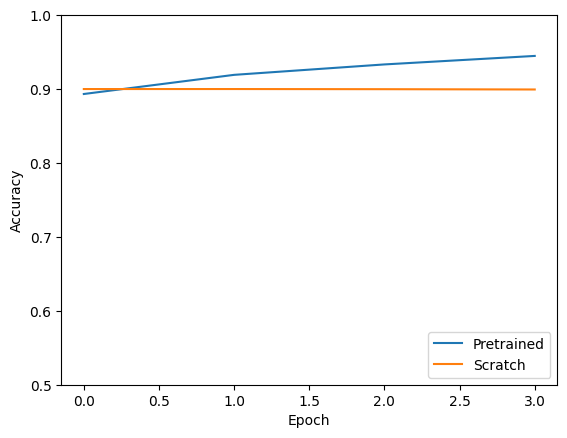

In [ ]:

# Plot the accuracy for both
plt.plot(history1.history['binary_accuracy'], label='Pretrained')
plt.plot(history_scratch.history['binary_accuracy'], label='Scratch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
